Accuracy: 0.83


C:\Users\10069\.conda\envs\deep\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


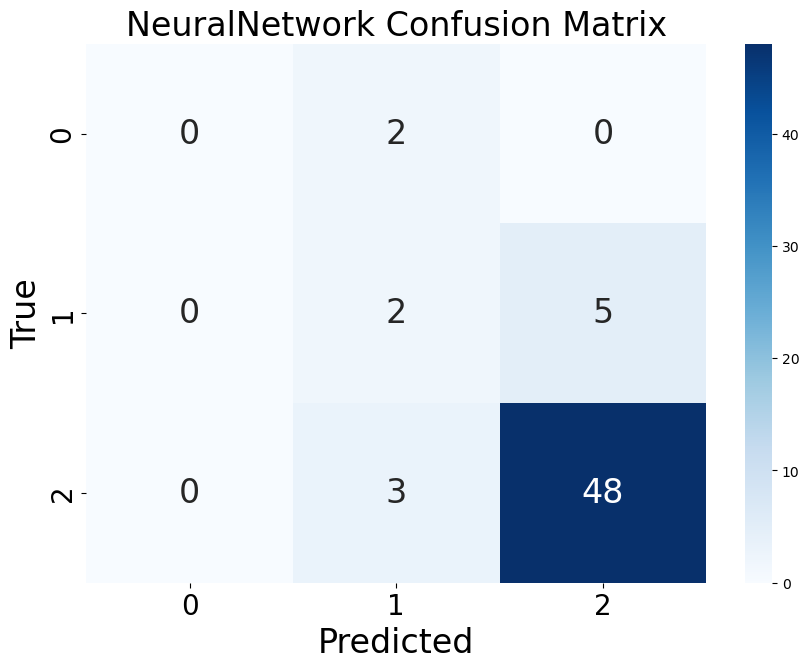


Misclassified Samples:
    True Label Predicted Label
43           0               1
284          1               2
147          1               2
40           0               1
4            2               1
170          1               2
34           2               1
76           1               2
7            2               1
132          1               2

错误样本已保存至: misclassified_samples.csv


In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# ======================
# 数据加载与预处理
# ======================
# 读取数据（excel文件中特征从第3列开始）
data = pd.read_excel('data.xlsx')
feature_names = list(data)
feature_names.remove('ID')
feature_names.remove('FeS-cluster')
feature_names.remove('Reactant')
feature_names.remove('deltaH')
feature_names.remove('forwardEa')
feature_names.remove('postEa')
feature_names.remove('Behavior')
flag_name = 'Behavior'
class_names = ['0', '1', '2']  
X = data[feature_names]
Y = data[flag_name].map({0:'0', 1:'1', 2:'2'})  # 直接映射文本标签

# 数据标准化（保持特征维度不变）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分数据集（添加stratify确保类别平衡）
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=42, stratify=Y)

# ======================
# 模型训练与评估
# ======================
# NN模型
model = MLPClassifier(alpha=0.001, activation='relu', solver='adam', random_state=55)
model.fit(X_train, y_train)

# 模型评估
y_test_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_test_pred):.2f}')

# 混淆矩阵可视化
# ======================
plt.figure(figsize=(10, 7))

# 生成混淆矩阵
cm = confusion_matrix(y_test, y_test_pred, labels=class_names)

# 绘制热力图并设置文本标签
ax = sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=class_names,  # X轴类别名
    yticklabels=class_names,  # Y轴类别名
    annot_kws={'fontsize': 24}
)

# 调整坐标轴字体大小
ax.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted', fontsize=24)
plt.ylabel('True', fontsize=24)
plt.title('NeuralNetwork Confusion Matrix', fontsize=24)
plt.show()

# ======================
# 模型评估与错误样本分析
# ======================
# 预测测试集
y_test_pred = model.predict(X_test)

# 获取预测错误的样本索引
misclassified_idx = np.where(y_test != y_test_pred)[0]

# 如果存在预测错误的样本
if len(misclassified_idx) > 0:
    # 从原始数据中提取错误样本的详细信息
    error_samples = data.iloc[y_test.iloc[misclassified_idx].index]
    
    # 添加预测结果和真实标签到DataFrame
    error_samples = error_samples.copy()  # 避免SettingWithCopyWarning
    error_samples['True Label'] = y_test.iloc[misclassified_idx].values
    error_samples['Predicted Label'] = y_test_pred[misclassified_idx]
    
    # 仅保留关键列：名称、真实标签、预测标签
    error_report = error_samples[['True Label', 'Predicted Label']]
    
    # 输出到控制台
    print("\nMisclassified Samples:")
    print(error_report)
    
    # 保存到CSV文件（可选）
    error_report.to_csv('misclassified_samples.csv', index=False)
    print("\n错误样本已保存至: misclassified_samples.csv")
else:
    print("\nAll samples classified correctly!")